## Проект: Исследование заведений общественного питания Москвы

Задача: исследовать рынок общепита Москвы, построить графики, дать рекомендации по открытию заведения с роботами.

### Описание данных
#### Таблица rest_data:

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import re
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

### <span style="color:blue"> Шаг 1: Чтение файла и сводная информация<span>

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
14252,222700,PLOV BOX,нет,кафе,"город Москва, Мячковский бульвар, дом 3А",0
3509,21384,Столовая лицея 1550,нет,буфет,"город Москва, Беговая улица, дом 19",70
11053,185047,Кафе,нет,кафе,"город Москва, Енисейская улица, дом 1, строение 1",48
9575,166091,Кафе «Юдашкин Плейз»,нет,кафе,"город Москва, Вознесенский переулок, дом 6/3, ...",50
14362,212042,Кафе «ЭКЛЕРКО»,нет,кафе,"город Москва, улица Барклая, дом 6, строение 5",23
1840,29414,столовая при гостинице,нет,столовая,"город Москва, Озерковская набережная, дом 26",30
14147,210128,McDonalds,нет,предприятие быстрого обслуживания,"город Москва, Шереметьевская улица, дом 20",1
14694,210783,КИТАЙСКАЯ ЛАПША «РАМЭН»,нет,кафе,"город Москва, Новослободская улица, дом 4",24
3822,152720,ФО ФА,нет,кафе,"город Москва, Усачёва улица, дом 26",44
8495,152896,Кафе Pho Bo,нет,кафе,"город Москва, поселение Сосенское, Калужское ш...",10


In [3]:
# перевела все названия и адреса в нижний регистр
df['object_name'] = df['object_name'].str.lower()
df['address'] = df['address'].str.lower()

In [4]:
# проверка на дубликаты
df.duplicated().sum()

0

In [5]:
m = df.drop(['id'] , axis=1)

In [6]:
m.duplicated().sum()

85

In [7]:
df.drop_duplicates(['object_name','chain', 'object_type', 'address', 'number'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
id             15281 non-null int64
object_name    15281 non-null object
chain          15281 non-null object
object_type    15281 non-null object
address        15281 non-null object
number         15281 non-null int64
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


### <span style="color:blue"> Шаг 2: Анализ данных <span>

#### Анализ по типам заведения

Считаю количество заведений разных типов

In [9]:
t = df.groupby(['object_type'])['id'].count().sort_values(ascending=False).reset_index()
t.columns = ['object_type', 'count']
t

,object_type,count
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,магазин (отдел кулинарии),273


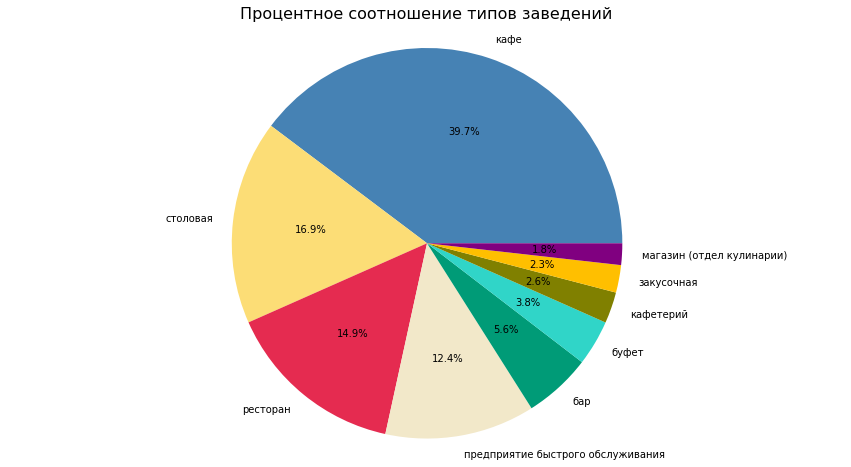

In [10]:
fig, ax=plt.subplots(figsize=(15, 8))
colors = ['#4682B4', '#FCDD76', '#E52B50', '#F2E8C9', '#009B77', '#30D5C8', '#808000', '#FFBF00', '#800080']
ax.pie(x=t['count'], labels = t['object_type'],  autopct='%1.1f%%', colors=colors)
plt.title('Процентное соотношение типов заведений', fontsize=16)
ax.axis("equal")
fig.show()

Заведения типа "кафе" наиболее распространены, почти 40% от общего рынка, на втором месте столовые, на третьем ресатораны, на четвертом фаст-фуды. Остальные типы менее распространены.

In [11]:
fig = px.bar(t, x='object_type', y='count',
             color='object_type',
             labels={'count':'Число заведений', 'object_type':'тип заведения'},
             title='Диаграмма количества заведений общественного питания по типам')
fig.update_xaxes(tickangle=45)
          
fig.show()

#### Соотношение сетевых и несетевых заведений

In [12]:
df['chain'].value_counts()

нет    12317
да      2964
Name: chain, dtype: int64

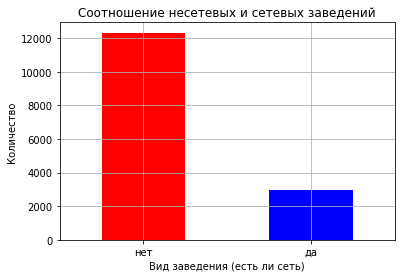

In [13]:
df['chain'].value_counts().plot(kind='bar', grid=True, color=['red', 'blue'])
plt.title('Соотношение несетевых и сетевых заведений', fontsize=12)
plt.ylabel("Количество", fontsize=10)
plt.xlabel("Вид заведения (есть ли сеть)", fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [14]:
# сводная таблица по сетевым заведениям
tab = df.pivot_table(index='object_type', columns = 'chain', values='id', aggfunc='count').sort_values(by='да', ascending = False).reset_index()
tab.columns = ['object_type', 'in_chain', 'not_in_chain']
tab['sum_obj']= tab['in_chain'] + tab['not_in_chain']
tab['percet_in chain'] = tab['in_chain'] / tab['sum_obj']
tab = tab.sort_values(by='percet_in chain', ascending = False)
tab

,object_type,in_chain,not_in_chain,sum_obj,percet_in chain
1,предприятие быстрого обслуживания,788,1109,1897,0.415393
3,магазин (отдел кулинарии),78,195,273,0.285714
2,ресторан,543,1739,2282,0.237949
0,кафе,1396,4675,6071,0.229946
4,закусочная,56,292,348,0.160920
5,кафетерий,52,343,395,0.131646
6,бар,37,818,855,0.043275
7,буфет,11,565,576,0.019097
8,столовая,3,2581,2584,0.001161


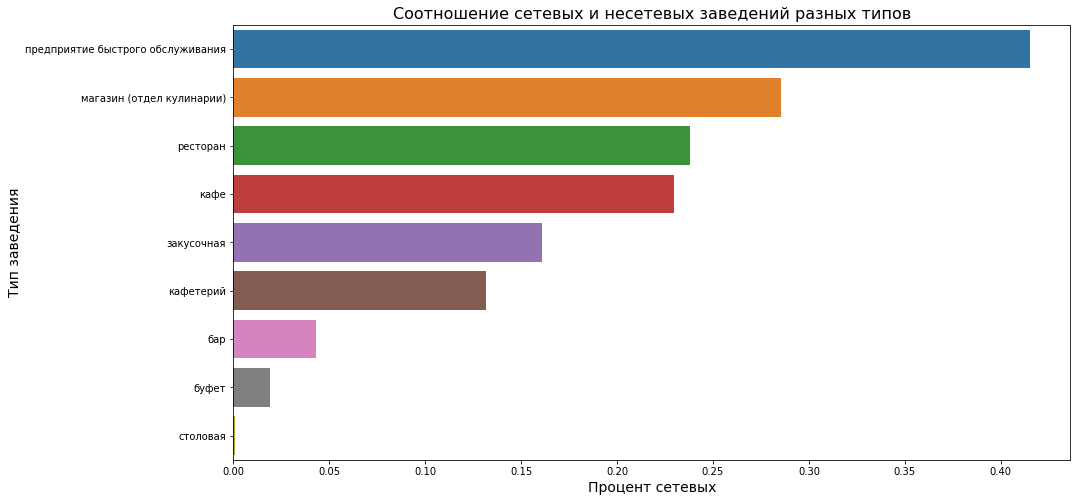

In [15]:
fig, ax=plt.subplots(figsize=(15, 8))
sns.barplot(ax=ax, y='object_type', x = 'percet_in chain', data=tab)
plt.title('Соотношение сетевых и несетевых заведений разных типов', fontsize=16)
plt.xlabel("Процент сетевых", fontsize=14)
plt.ylabel("Тип заведения", fontsize=14)
plt.show()


Заведений типа "кафе" по количеству гораздо больше "предприятий быстрого обслуживания", но процент сетевых заведений там меньше. Больше всего сетевых фаст-фудов, на втором месте магазины с отделами кулинарии и на третьем рестораны. Сетевых кафе в целом тоже достаточно много, но количество маленьких одиночных кафешек перевешивает.

#### Анализ количества посадочных мест в сетевых заведениях

In [16]:
df.pivot_table(index=['object_type', 'chain'], values=['id', 'number'], aggfunc={'id':'count', 'number':'sum'})

id  number
object_type                       chain              
бар                               да       37    1962
                                  нет     818   35259
буфет                             да       11     140
                                  нет     565   29481
закусочная                        да       56     805
                                  нет     292    1926
кафе                              да     1396   66208
                                  нет    4675  175331
кафетерий                         да       52     638
                                  нет     343    2990
магазин (отдел кулинарии)         да       78     677
                                  нет     195     849
предприятие быстрого обслуживания да      788   31772
                                  нет    1109    7702
ресторан                          да      543   54497
                                  нет    1739  166594
столовая                          да        3     337
                                  нет    2581  336456

In [17]:
p = df.query('chain == "да"')

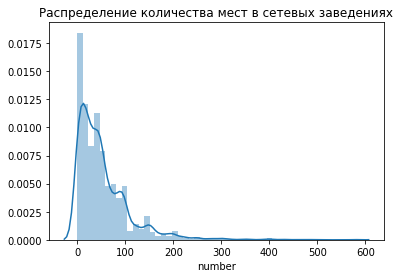

In [18]:
sns.distplot(p['number'])
plt.title('Распределение количества мест в сетевых заведениях', fontsize=12)
plt.show()

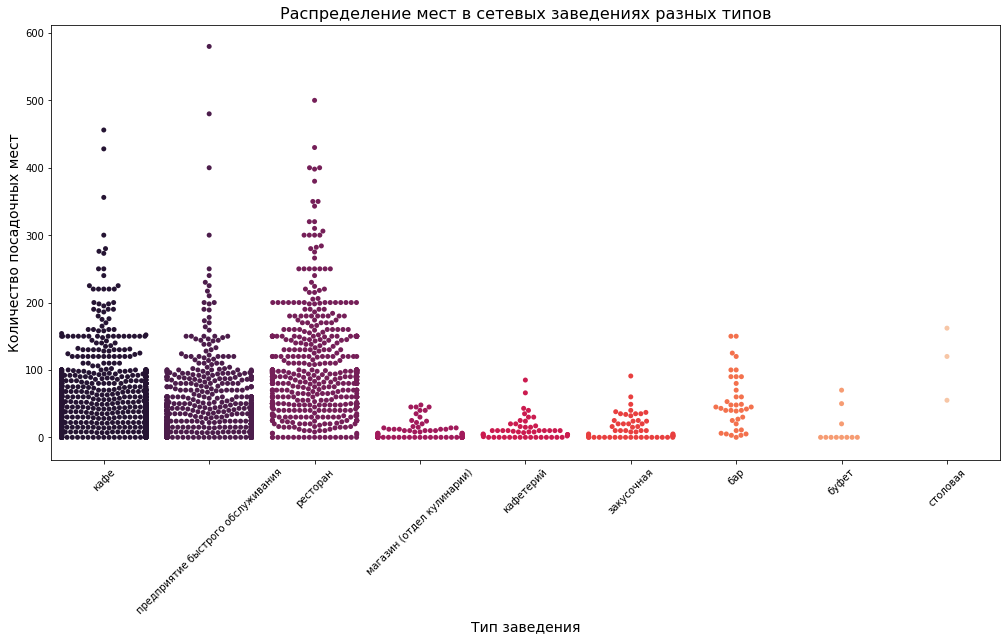

In [19]:
fig, ax=plt.subplots(figsize=(17, 8))
sns.swarmplot(x='object_type', y="number", data=p, palette='rocket')
plt.title('Распределение мест в сетевых заведениях разных типов', fontsize=16)
plt.ylabel("Количество посадочных мест", fontsize=14)
plt.xlabel("Тип заведения", fontsize=14)
plt.xticks(rotation=45)
plt.show()

В основном во всех заведениях до 100 мест. В кафе, фаст-фудах и ресторанах распределение мест больше, есть очень большие значения в районе 400-600 мест, подозрительно, но допустим это очень большой фудкорт, где не одно заведение.

#### Анализ количества посадочных мест в самых крупных сетевых заведениях

In [20]:
top = p.groupby(['object_name']).agg({'id':'count', 'number': 'mean'}).sort_values(by='id', ascending=False).head(10).reset_index()
top.columns = ['name', 'count_object', 'mean_number']
top

,name,count_object,mean_number
0,шоколадница,157,57.184713
1,kfc,155,55.341935
2,макдоналдс,150,87.700000
3,бургер кинг,137,46.649635
4,теремок,94,25.606383
5,крошка картошка,90,21.855556
6,домино'с пицца,90,18.344444
7,милти,72,1.333333
8,суши wok,72,6.708333
9,папа джонс,51,22.039216


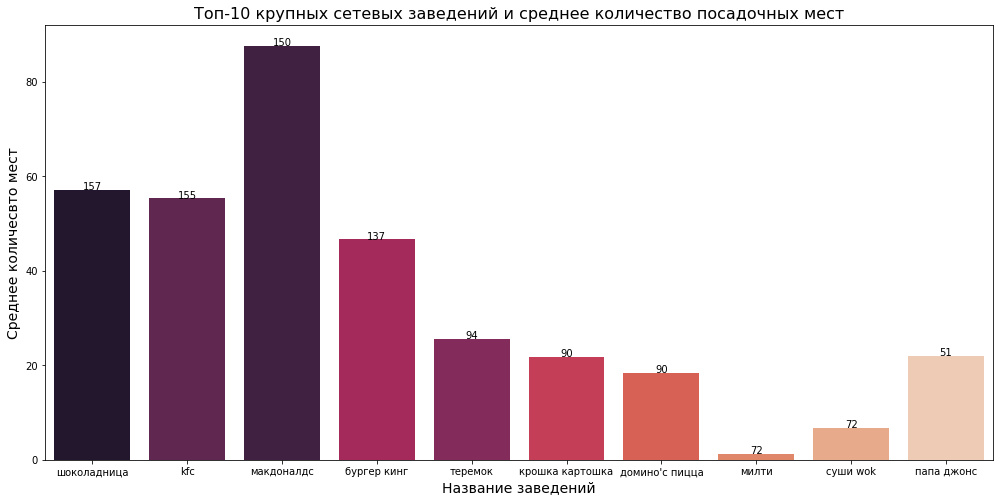

In [21]:
fig, ax=plt.subplots(figsize=(17, 8))
sns.color_palette("rocket", len(top))
pal = sns.color_palette("rocket", len(top))
rank = top["count_object"].argsort() 
g=sns.barplot(x='name',y='mean_number',data=top, palette=np.array(pal[::-1])[rank])

for index, row in top.iterrows():
       g.text(row.name,row.mean_number, round(row.count_object,2), color='black', ha="center")
        
plt.title('Топ-10 крупных сетевых заведений и среднее количество посадочных мест', fontsize=16)
plt.ylabel("Среднее количесвто мест", fontsize=14)
plt.xlabel("Название заведений", fontsize=14)
plt.show()

Кафе сети Макдоналдс меньше чем Шоколадниц и KFC, но среднее количесвто мест почти на 30 больше. Интересно еще посмотреть на кафе Милти, заведений много, но посадочных мест вообще почти нет, видимо они работают только с едой "на вынос".

In [22]:
median_numb = df.pivot_table(index='object_type', values='number', aggfunc='median').sort_values(by='number', ascending=False).reset_index()

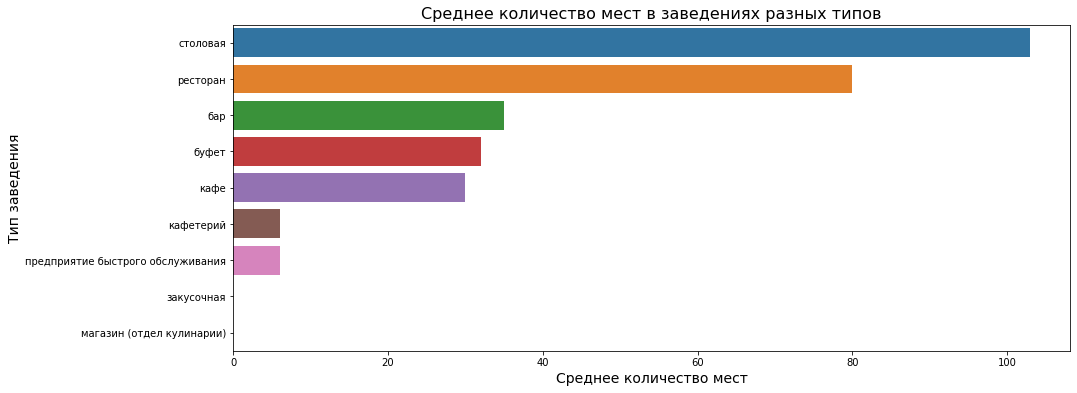

In [23]:
plt.figure(figsize=(15, 6))
sns.barplot(y='object_type', x='number', data=median_numb)
plt.title('Среднее количество мест в заведениях разных типов', fontsize=16)
plt.xlabel("Среднее количество мест", fontsize=14)
plt.ylabel("Тип заведения", fontsize=14)

plt.show()

Больше всего мест в столовых, на втором месте рестораны, на третьем бары. В кафе в среднем 35 мест.

#### Выделение улиц

In [24]:
df['address'] = df['address'].str.replace('город москва,', '')
df['address'] = df['address'].str.replace('город зеленоград,', '')
df['address'] = df['address'].str.replace('поселение сосенское,', '')

Убираю город москва, город зеленоград, поселение сосненское из адреса, т.к. кое где название улиц в начале строки с адресом, а где то начинается сначала с "город москва" и т.п., а так как я дальше забираю первые символы до первой запятой, они у меня попадали в анализ)

In [25]:
# извлекаю все до первой запятой
df['street']= df['address'].str.extract(r'([^,]*)', expand=False)

In [26]:
# убираю возможные лишние символы
df['street']= df['street'].str.strip()

In [27]:
df['street'].isna().sum()

0

In [28]:
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


Это конечно корявенький способ, но мне не понравился тот вариант,который обсуждался в слаке, они там выбирают любое количество цифр и букв идущие до или после ключевых слов улица и переулок, но там же еще куча других типов названий улиц (проезды, набережные и тд). Но я осознаю, что такой вариант как у меня, не сработает, если бы адреса записаны были в рандомном порядке и если надо, переделаю=)

#### Выделение топ-10 улиц

In [29]:
t = df['street'].value_counts().head(10).reset_index()
t

,index,street
0,проспект мира,203
1,профсоюзная улица,182
2,ленинградский проспект,172
3,пресненская набережная,167
4,варшавское шоссе,162
5,ленинский проспект,148
6,проспект вернадского,128
7,кутузовский проспект,114
8,каширское шоссе,111
9,кировоградская улица,108


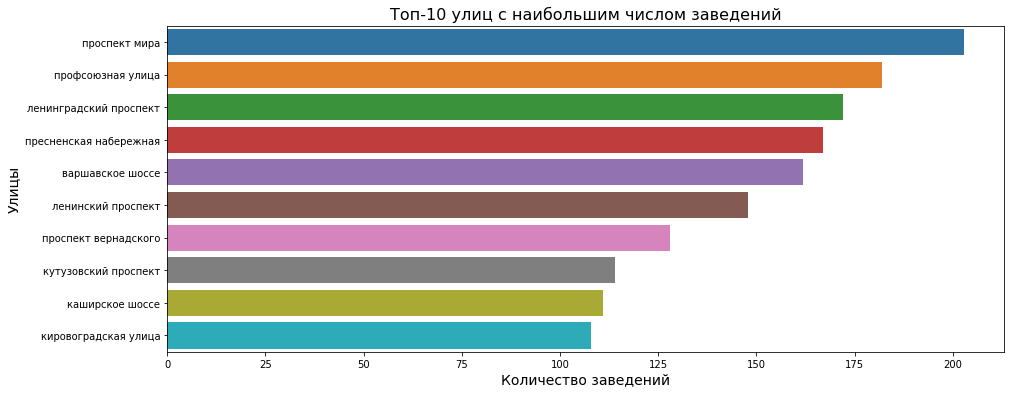

In [30]:
plt.figure(figsize=(15, 6))
sns.barplot(y='index', x='street', data=t)
plt.title('Топ-10 улиц с наибольшим числом заведений', fontsize=16)
plt.xlabel("Количество заведений", fontsize=14)
plt.ylabel("Улицы", fontsize=14)

plt.show()

Проспект Мира единственная улица, на которой более 200 заведений.

In [31]:
# количество объектов на каждой улице
s = df.groupby(['street'])['id'].count().reset_index()
s.columns=['street', 'count_obj']

In [32]:
df = pd.merge(df, s, on='street', how='left')

#### Добавление информации о районах

In [33]:
# districts = pd.read_csv('mosgaz-streets.csv')

In [34]:
districts = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')

In [35]:
districts.info()
districts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [36]:
districts['streetname'] = districts['streetname'].str.lower()
districts['streetname'] = districts['streetname'].str.strip()
districts.rename(columns={'streetname': 'street'}, inplace=True)

In [37]:
df = pd.merge(df, districts, on='street', how='left')

In [38]:
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29857 entries, 0 to 29856
Data columns (total 11 columns):
id             29857 non-null int64
object_name    29857 non-null object
chain          29857 non-null object
object_type    29857 non-null object
address        29857 non-null object
number         29857 non-null int64
street         29857 non-null object
count_obj      29857 non-null int64
areaid         28938 non-null float64
okrug          28938 non-null object
area           28938 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 2.7+ MB


,id,object_name,chain,object_type,address,number,street,count_obj,areaid,okrug,area
9880,82639,крошка картошка,да,предприятие быстрого обслуживания,"ярославское шоссе, дом 54",69,ярославское шоссе,65,86.0,СВАО,Ярославский Район
16548,147102,кафе «russkii»,нет,кафе,"пресненская набережная, дом 2",50,пресненская набережная,167,17.0,ЦАО,Пресненский район
24771,200597,фирма бит,нет,кафе,"профсоюзная улица, дом 61а",20,профсоюзная улица,182,132.0,ЮЗАО,Район Черемушки
10866,141918,домино'с пицца,да,предприятие быстрого обслуживания,"щербаковская улица, дом 41б",6,щербаковская улица,16,36.0,ВАО,Район Соколиная Гора
25112,194774,forest,нет,ресторан,"ленинградское шоссе, дом 51, строение 4",96,ленинградское шоссе,100,63.0,САО,Район Левобережный
20648,174921,рачевня «поплавок»,нет,ресторан,"мясницкая улица, дом 7, строение 1",55,мясницкая улица,73,15.0,ЦАО,Красносельский район
4097,141369,будвайзер бар,нет,бар,"люсиновская улица, дом 9",80,люсиновская улица,24,14.0,ЦАО,Район Замоскворечье
15675,22441,лига пап,нет,ресторан,"улица большая лубянка, дом 24/15, строение 1",65,улица большая лубянка,5,15.0,ЦАО,Красносельский район
29737,211203,додо пицца,да,кафе,"волгоградский проспект, дом 15",42,волгоградский проспект,63,121.0,ЮВАО,Район Текстильщики
19879,185280,донер,нет,закусочная,"дмитровское шоссе, дом 50, корпус 1",0,дмитровское шоссе,100,60.0,САО,Дмитровский район


In [39]:
df.dropna(inplace=True)

Вот не уверена,что конкретно тут надо делать с пропусками, но решила их лихо дропнуть в надежде, что это не сильно исказит данные и если для улицы не нашлось района это все равно мне не поможет в дальнейшем анализе по районам.

#### Районы с наибольшим количеством заведений

In [40]:
a = df.pivot_table(index=['area', 'street'], values='count_obj').sort_values(by='count_obj', ascending=False).reset_index()
a.head(30)

,area,street,count_obj
0,Район Ростокино,проспект мира,203
1,Район Марьина роща,проспект мира,203
2,Останкинский район,проспект мира,203
3,Мещанский район,проспект мира,203
4,Район Свиблово,проспект мира,203
5,Алексеевский район,проспект мира,203
6,Ярославский Район,проспект мира,203
7,Район Теплый Стан,профсоюзная улица,182
8,Обручевский район,профсоюзная улица,182
9,Район Ясенево,профсоюзная улица,182


Тут конечно наглядно видно, что одна улица проходит через несколько районов и каждому району приписывается заведения из других районов ,но относящихся к одной улице.

In [41]:
r = df.groupby(['area'])['id'].count().sort_values(ascending=False).head(10).reset_index()
r

,area,id
0,Тверской район,1126
1,Пресненский район,793
2,Басманный район,705
3,Даниловский район,670
4,Мещанский район,662
5,Донской район,583
6,Таганский район,542
7,Обручевский район,495
8,Район Замоскворечье,480
9,Район Гагаринский,471


Тут я посчитала топовые районы, но это не совсем правильно, адрес заведения должен попадать только в один район, а так как объединяла я датафреймы по улицам и считала количество заведений по ним, а длинные улицы проходят через несколько районов, получается одно заведение попадает в нескольок районов. Хорошо бы анализировать по адресу, но представляю, что если найти справочник с адресами и попытаться это все соединиить, jupyter может не выдержать нагрузки.

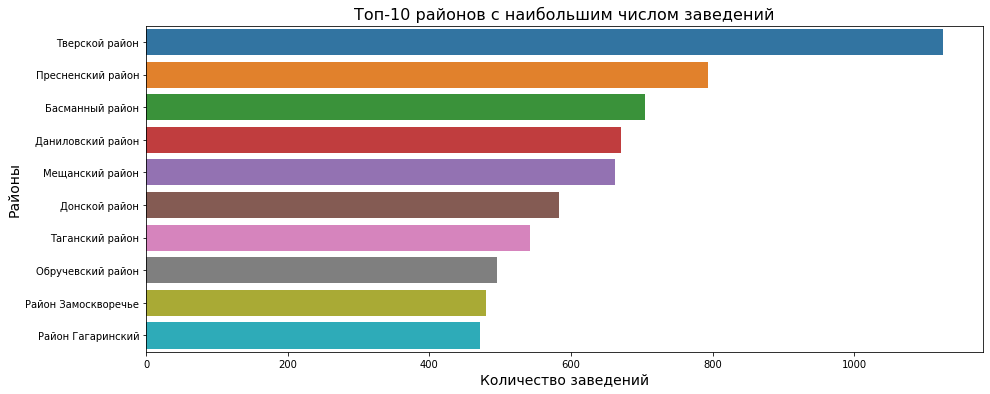

In [42]:
plt.figure(figsize=(15, 6))
sns.barplot(y='area', x='id', data=r)
plt.title('Топ-10 районов с наибольшим числом заведений', fontsize=16)
plt.xlabel("Количество заведений", fontsize=14)
plt.ylabel("Районы", fontsize=14)

plt.show()

#### Улицы с одним заведением

In [43]:
s[s['count_obj']==1].count()

street       638
count_obj    638
dtype: int64

Получается всего 638 улиц с одним заведением, выглядит как будто многовато, но в Москве более 3500 улиц, так что все может быть.

In [44]:
one_obj = df.query('count_obj == 1').reset_index()

In [45]:
one_obj.sample(10)

,index,id,object_name,chain,object_type,address,number,street,count_obj,areaid,okrug,area
490,20474,184803,пиццбургеr №1,нет,кафе,"улица пржевальского, дом 2",12,улица пржевальского,1,50.0,ЗАО,Район Очаково-Матвеевское
196,7258,27019,гостиница лефортово,нет,ресторан,"1-й краснокурсантский проезд, дом 1/4",200,1-й краснокурсантский проезд,1,114.0,ЮВАО,Район Лефортово
46,2845,87543,кафе «one teaspoon»,нет,кафе,"яузский бульвар, дом 14/8",16,яузский бульвар,1,18.0,ЦАО,Таганский район
190,7118,19883,солнечный очаг,нет,ресторан,"улица богданова, дом 56б",60,улица богданова,1,46.0,ЗАО,Район Солнцево
537,25029,201719,самарканд,нет,кафе,"производственная улица, дом 1, корпус 1, стро...",15,производственная улица,1,46.0,ЗАО,Район Солнцево
403,15529,20122,сабрина,нет,кафе,"аэрофлотская улица, владение 2б",24,аэрофлотская улица,1,43.0,ЗАО,Район Внуково
71,4020,22627,ривер,нет,кафе,"малый власьевский переулок, дом 12, строение 2",24,малый власьевский переулок,1,20.0,ЦАО,Район Хамовники
391,14116,28965,загорье шк. 902,нет,столовая,"педагогическая улица, дом 3",240,педагогическая улица,1,95.0,ЮАО,Район Бирюлево Восточное
73,4070,137801,казан чай бар,нет,ресторан,"малый татарский переулок, дом 8, строение 1",46,малый татарский переулок,1,14.0,ЦАО,Район Замоскворечье
24,1391,24319,гивисациви,нет,кафе,"лужнецкий проезд, дом 1",95,лужнецкий проезд,1,20.0,ЦАО,Район Хамовники


In [46]:
one_obj['area'].value_counts().tail(19)

Район Ивановское              1
Район Гагаринский             1
Район Южное Медведково        1
Молжаниновский район          1
Район Марьино                 1
Район Строгино                1
Район Нагатино-Садовники      1
Район Филевский Парк          1
Район Метрогородок            1
Район Левобережный            1
Район Лианозово               1
Обручевский район             1
Район Москворечье-Сабурово    1
Район Чертаново Южное         1
Район Западное Дегунино       1
Район Царицыно                1
Район Марфино                 1
Район Чертаново Северное      1
Алтуфьевский район            1
Name: area, dtype: int64

В этих районах меньше всего заведений: по одной улице с одним заведением.

<div class="alert alert-success">
<h2> Комментарий ревьюера (2)</h2>

Все верно.

#### Распределение посадочных мест на улицах с большим количеством заведений

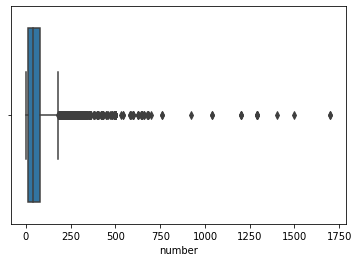

In [47]:
sns.boxplot(x=df['number'])
plt.show()

In [48]:
place = df.query('number < 250')

Уменьшила выборку, чтобы ниже график получился более наглядным.

In [49]:
#топ-10 улиц
top_street = df.groupby('street')[['id']].count()\
    .sort_values('id', ascending = False)\
    .head(10).index.values.tolist()

In [50]:
N = (len(top_street))

In [51]:
# цвета для визуализации
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

In [52]:
data = [{
    'y': place[place['street'] == top_street[i]]['number'], 
    'type':'box',
    'marker':{'color': c[i]},
    'name': top_street[i]
    } for i in range(len(top_street))]

In [53]:
layout = go.Layout(
    title='Распределение посадочных мест на улицах с наибольшим количествои заведений',
    yaxis = {'title': 'Количество мест'}
)   

fig = go.Figure(data = data, layout = layout)
iplot(fig)

В среднем на крупных улицах заведения с количеством посадочных мест до 50 штук. На Волгоградском проспекте и проспекте Мира видимо есть какие большие заведения, у них медианные значения наиболее близки к 50.

### <span style="color:blue"> Шаг 3: Презентация <span>

Ссылка на презентацию: https://yadi.sk/d/HaiQe9M9kvvXwg

### <span style="color:blue"> Шаг 4: Выводы и рекомендации <span>

Был проанализирован рынок заведений общественного питания Москвы. В результате анализв выделены:

    1) Наиболее распространенные типы заведений: кафе, столовые, рестораны, фаст-фуды.
    2) Наиболее распространенные типы сетевых заведений: фаст-фуды, магазины с отделами кулинарии, рестораны.
    3) Самые распространенные сетевые заведения:
        - шоколадница
        - kfc
        - макдоналдс
        - бургер кинг
        - теремок
        - крошка картошка
        - домино'с пицца
        - милти
        - суши wok
        - папа джонс
        
    4) Во всех типах заведений в основном до 100 посадочных мест, в кафе, фаст-фудах и ресторанах распределение мест больше.
    5) Самые многочисленные по количеству заведений на них улицы: 
    
        - проспект мира 
        - профсоюзная улица
        - ленинградский проспект
        - пресненская набережная 
        - варшавское шоссе 
        - ленинский проспект 
        - проспект вернадского 
        - кутузовский проспект 
        - каширское шоссе 
        - кировоградская улица
      
     6) Самые многочисленные ао количеству заведений районы:
     
        - Тверской район
        - Пресненский район
        - Басманный район
        - Даниловский район
        - Мещанский район
        - Донской район
        - Таганский район
        - Обручевский район 
        - Район Замоскворечье
        - Район Гагаринский 	

Рекомендации для открытия нового заведения с роботами-официантами (назову его "В рот мне бот"). 

1) По типу заведения я бы рекомендовала остановится на кафе. При открытии заведения акцент делается на то, что это заведение с роботами, значит можно сэкономить на меню и не предоставлять каких то особенных блюд. Ресторан уже позиционирует себя так, что уровень блюд там должен быть выше, а в фаст фуде во-первых, большая конкуренция с известными брендами типа Макдональдс, КФС и тд, во-вторых фишку с роботами можно приминить только когда посетитель делает заказ у стойки. Если сделать кафе, то можно использовать роботов как официантов.

2) По расположению, я бы не выбирала самые популярные улицы, на них и так уже достаочно других заведений, но и не стоит выбирать труднодоступные места и промышленные районы. Можно посмотреть где находятся какие нибудь бизнес-центры и расположить возле них, чтобы люди ходили в кафе на обед. Но еще лучше проанализировать информацию о парках, парках атракционов и других местах где часто гуляют с детьми. Я думаю, что детям будет особенно интересно кафе с роботами и они будут постоянно родителей просить туда зайти и принесут больше денег.

3) Я бы не делала такое кафе большой сетью, мне кажется, что это слишком дорогостоящий проект, можно сделать 5 кафе на город, чтобы людям из разных мест было удобнее добираться, но если таких кафе станет очень много, то потеряется индивидуальнось.